In [36]:
import pandas as pd
import matplotlib.pyplot as plt

Headache             55859
Fatigue              51549
Chills               43282
Pyrexia              42797
Pain                 40463
Dizziness            40438
Nausea               30918
Pain in extremity    28882
COVID-19             26493
Arthralgia           23294
Name: count, dtype: int64


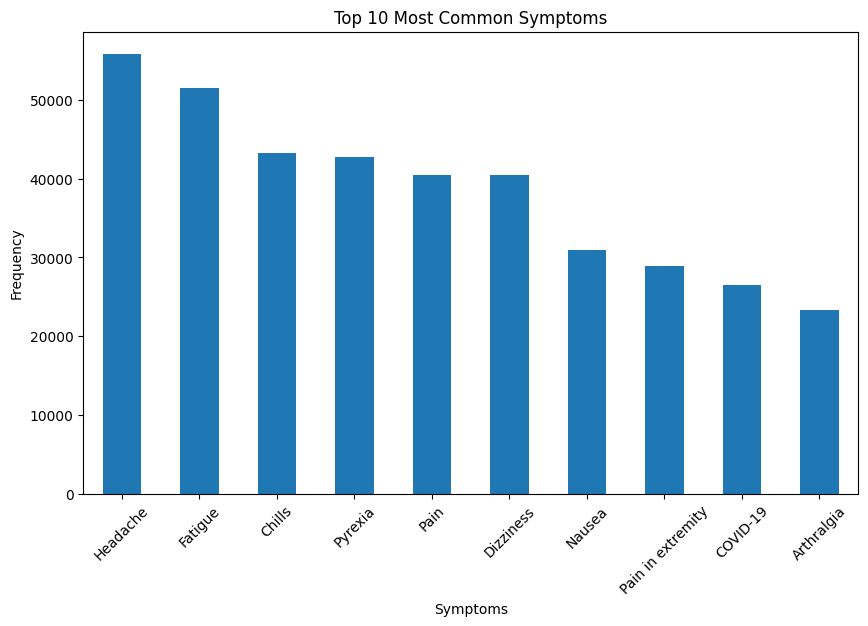

In [41]:


# Read the CSV file
df = pd.read_csv('cleaned_vers_data_covid19_vaccine_2020-2022.csv')

# Concatenate the symptom columns into a single column
symptoms = pd.concat([df['SYMPTOM1'], df['SYMPTOM2'], df['SYMPTOM3'], df['SYMPTOM4']], ignore_index=True)
df['symp'] = symptoms

# Get the top 15 most common symptoms
top_10_symptoms = symptoms[symptoms != 'No symptom'].value_counts().head(10)
print(top_10_symptoms)
# Plot the bar chart
plt.figure(figsize=(10, 6))
top_10_symptoms.plot(kind='bar')
plt.title('Top 10 Most Common Symptoms')
plt.xlabel('Symptoms')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


In [ ]:
df.head()
df.columns.to_list()

['VAERS_ID',
 'RECVDATE',
 'STATE',
 'AGE_YRS',
 'CAGE_YR',
 'SEX',
 'SYMPTOM_TEXT',
 'DIED',
 'DATEDIED',
 'L_THREAT',
 'ER_VISIT',
 'HOSPITAL',
 'HOSPDAYS',
 'X_STAY',
 'DISABLE',
 'RECOVD',
 'VAX_DATE',
 'ONSET_DATE',
 'NUMDAYS',
 'V_ADMINBY',
 'OTHER_MEDS',
 'CUR_ILL',
 'HISTORY',
 'PRIOR_VAX',
 'FORM_VERS',
 'TODAYS_DATE',
 'BIRTH_DEFECT',
 'OFC_VISIT',
 'ER_ED_VISIT',
 'ALLERGIES',
 'VAX_TYPE',
 'VAX_MANU',
 'VAX_LOT',
 'VAX_DOSE_SERIES',
 'VAX_ROUTE',
 'VAX_SITE',
 'VAX_NAME',
 'SYMPTOM1',
 'SYMPTOMVERSION1',
 'SYMPTOM2',
 'SYMPTOMVERSION2',
 'SYMPTOM3',
 'SYMPTOMVERSION3',
 'SYMPTOM4',
 'SYMPTOMVERSION4']

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
#df = pd.read_csv('cleaned_vers_data_covid19_vaccine_2020-2022.csv')

# Count the occurrences of each vaccine type
vaccine_counts = df['OTHER_MEDS'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10, 6))
vaccine_counts.plot(kind='bar')
plt.title('Number of Reports by Vaccine Type')
plt.xlabel('Vaccine Type')
plt.ylabel('Number of Reports')
plt.xticks(rotation=45)
plt.show()


<Axes: >

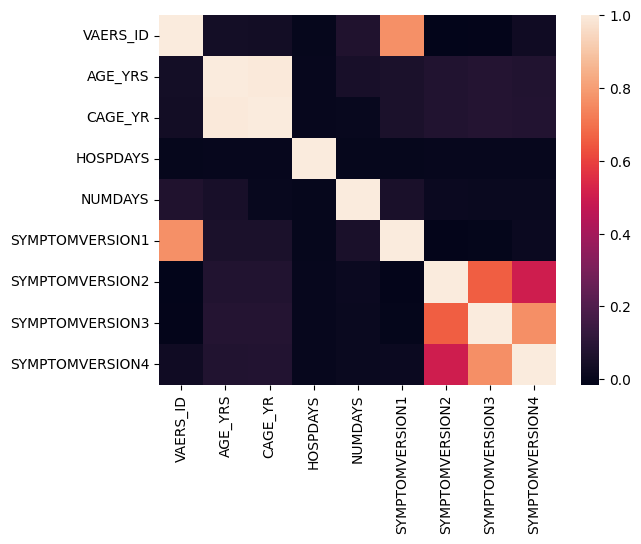

In [ ]:
# corealtion heat map for the data
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# create a dataset from df with only numeric values
heattmap_data = df.select_dtypes(include=['float64', 'int64'])
# remove FORM_VERS column because iit iis constant
heattmap_data = heattmap_data.drop(columns=['FORM_VERS'])

sns.heatmap(heattmap_data.corr())

In [ ]:
# true and false dataset
bool_data = df.select_dtypes(include=['bool'])
# get bool data from df
bool_data = df.select_dtypes(include=['bool'])
bool_data

""
0
1
2
3
4
...
569030
569031
569032
569033


In [44]:
df["OFC_VISIT"].value_counts()
df['symp']

0                                      Hypoaesthesia
1                                           Headache
2                                           Erythema
3                                          Dizziness
4                                          Dysgeusia
                             ...                    
569030                                     Limb mass
569031                                Brain neoplasm
569032    Incorrect product formulation administered
569033                                      Tinnitus
569034                           Atrial fibrillation
Name: symp, Length: 569035, dtype: object

In [45]:
# convert top_10_symptoms to a list
top_10_symptoms_list = top_10_symptoms.index.to_list()
filtered_df = df[df['symp'].isin(top_10_symptoms_list)]
filtered_df

,VAERS_ID,RECVDATE,STATE,AGE_YRS,CAGE_YR,SEX,SYMPTOM_TEXT,DIED,DATEDIED,L_THREAT,...,VAX_NAME,SYMPTOM1,SYMPTOMVERSION1,SYMPTOM2,SYMPTOMVERSION2,SYMPTOM3,SYMPTOMVERSION3,SYMPTOM4,SYMPTOMVERSION4,symp
1,902440,12/15/2020,AZ,35.0,35.0,F,C/O Headache,N,Not applicable,N,...,COVID19 (COVID19 (PFIZER-BIONTECH)),Headache,23.1,No symptom,0.0,No symptom,0.0,No symptom,0.0,Headache
3,902464,12/15/2020,LA,42.0,42.0,M,within 15 minutes progressive light-headedness...,N,Not applicable,N,...,COVID19 (COVID19 (PFIZER-BIONTECH)),Dizziness,23.1,Electrocardiogram normal,23.1,Hyperhidrosis,23.1,Laboratory test normal,23.1,Dizziness
6,902490,12/15/2020,NM,37.0,37.0,F,"Headache, body ache",N,Not applicable,N,...,COVID19 (COVID19 (PFIZER-BIONTECH)),Headache,23.1,Pain,23.1,No symptom,0.0,No symptom,0.0,Headache
8,902493,12/15/2020,SD,24.0,24.0,M,At 12:55 pm 10 minutes following vaccine being...,N,Not applicable,N,...,COVID19 (COVID19 (PFIZER-BIONTECH)),Dizziness,23.1,Flushing,23.1,No symptom,0.0,No symptom,0.0,Dizziness
16,902572,12/16/2020,TX,24.0,24.0,F,Pfizer-BioNTech COVID-19 Vaccine EUA Develope...,N,Not applicable,N,...,COVID19 (COVID19 (PFIZER-BIONTECH)),Chills,23.1,Nausea,23.1,Vomiting,23.1,No symptom,0.0,Chills
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
569006,2547664,12/30/2022,OH,46.0,46.0,F,At first I got the normal COVID vaccine sympto...,N,Not applicable,N,...,COVID19 (COVID19 (MODERNA)),Pain,25.1,Pain in extremity,25.1,Palpitations,25.1,Peripheral swelling,25.1,Pain
569007,2547666,12/30/2022,SD,63.0,63.0,M,My wife and I were vaccinated on the same day/...,N,Not applicable,N,...,COVID19 (COVID19 (PFIZER-BIONTECH BIVALENT)),COVID-19,25.1,Exposure to SARS-CoV-2,25.1,Illness,25.1,SARS-CoV-2 test positive,25.1,COVID-19
569012,2547672,12/31/2022,MA,31.0,31.0,F,"Systemic: Fainting / Unresponsive-Medium, Addi...",N,Not applicable,N,...,COVID19 (COVID19 (MODERNA BIVALENT)),Dizziness,25.1,Fall,25.1,Syncope,25.1,Unresponsive to stimuli,25.1,Dizziness
569019,2547690,12/31/2022,MI,88.0,88.0,M,Patient legs started going out around 3 pm. So...,N,Not applicable,N,...,COVID19 (COVID19 (MODERNA BIVALENT)),Pyrexia,25.1,No symptom,0.0,No symptom,0.0,No symptom,0.0,Pyrexia


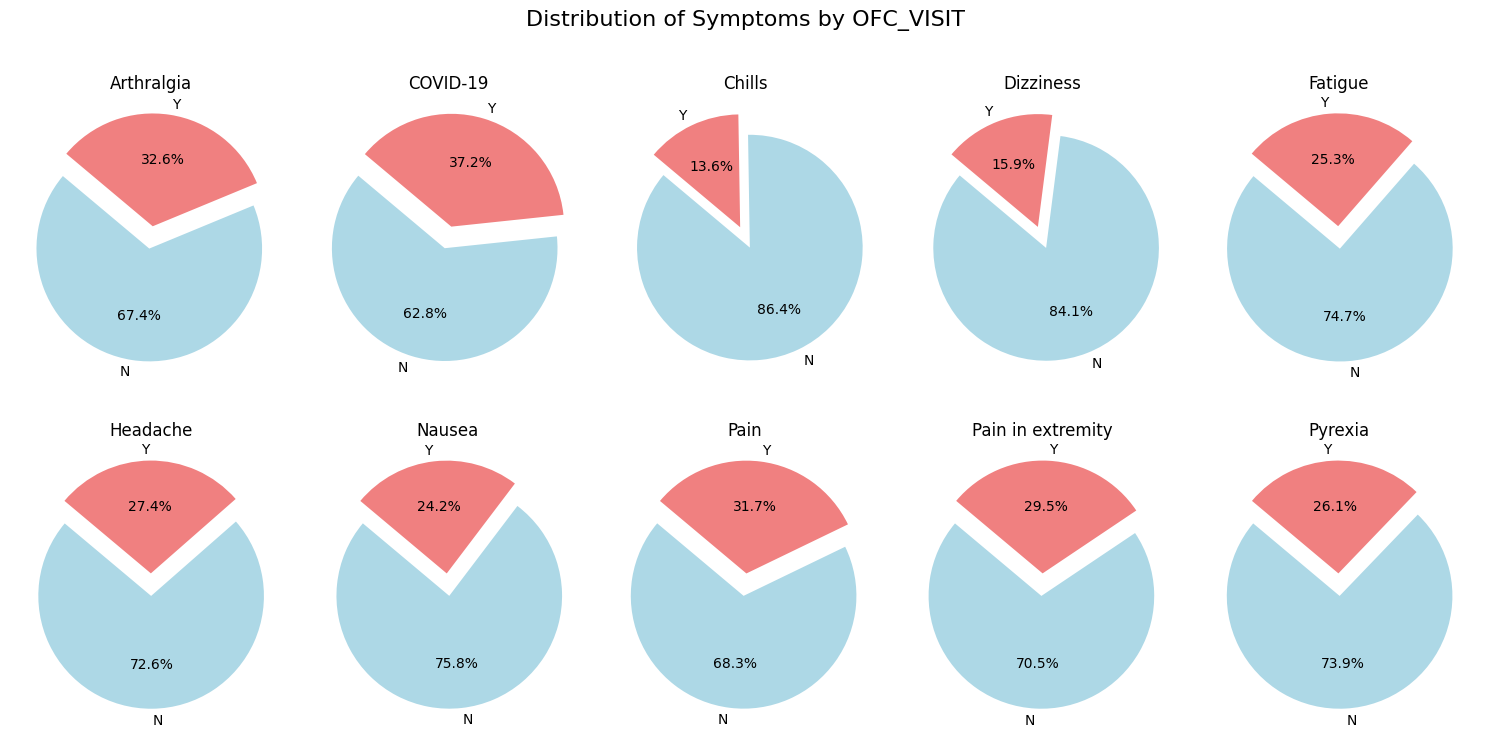

In [69]:
# Create a new DataFrame with counts for each symptom and gender
symptom_gender_counts = filtered_df.groupby(['symp', 'OFC_VISIT']).size().unstack(fill_value=0)
# symptom_gender_counts["Arthralgia"]
# Set up subplots
num_symptoms = len(symptom_gender_counts)
num_cols = 5  # Adjust the number of columns based on your preference
num_rows = (num_symptoms + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))

# Iterate over each symptom and plot a pie chart
for i, (symptom, row) in enumerate(symptom_gender_counts.iterrows()):
    row_index = i // num_cols
    col_index = i % num_cols

    colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightgrey']  # Customize colors as needed
    explode = (0.1,) * len(row.index)  # Adjust the explode values to have the same length as the number of categories

    axes[row_index, col_index].pie(row, labels=row.index, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
    axes[row_index, col_index].set_title(f'{symptom}')

# Add main title
main_title = "Distribution of Symptoms by OFC_VISIT"
plt.suptitle(main_title, fontsize=16)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

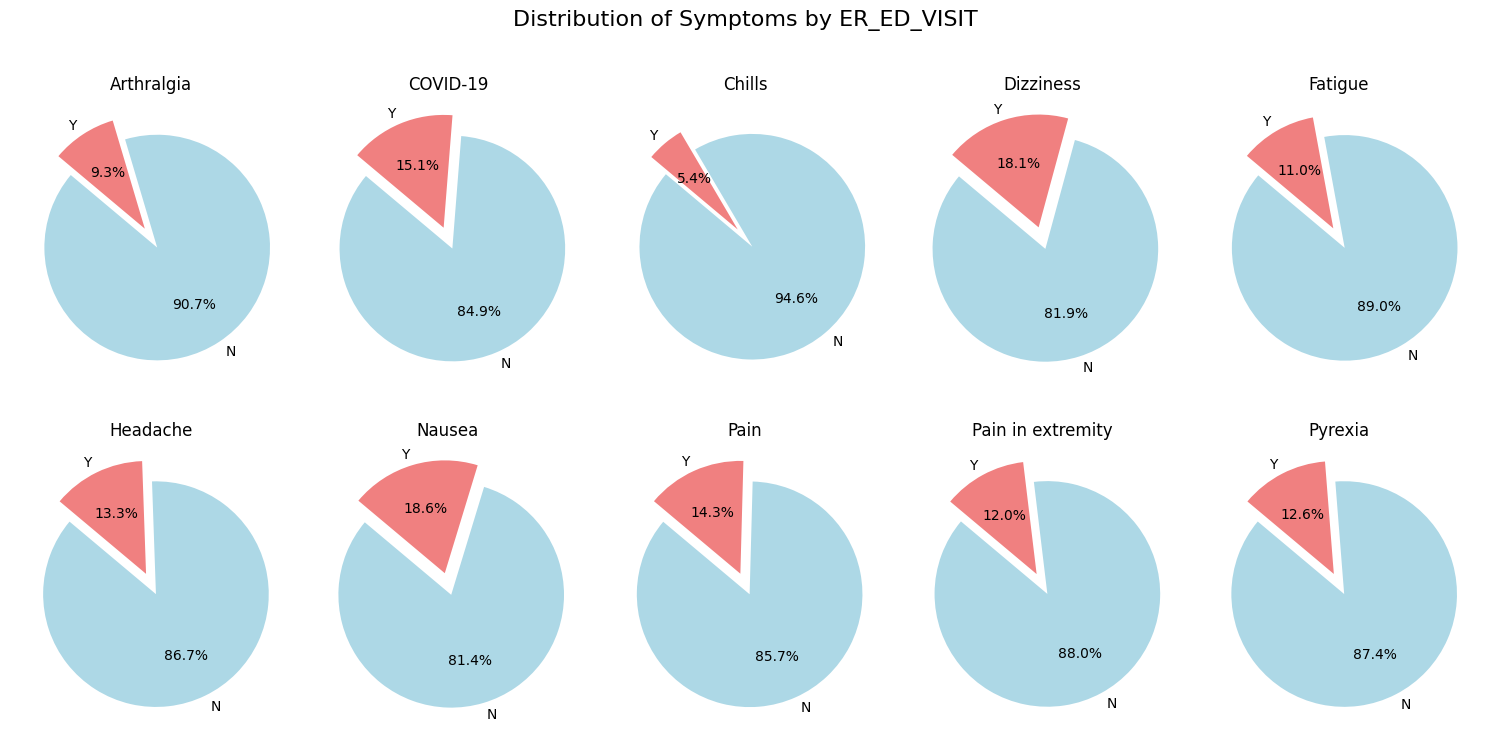

In [68]:
# Create a new DataFrame with counts for each symptom and gender
symptom_gender_counts = filtered_df.groupby(['symp', 'ER_ED_VISIT']).size().unstack(fill_value=0)
# symptom_gender_counts["Arthralgia"]
# Set up subplots
num_symptoms = len(symptom_gender_counts)
num_cols = 5  # Adjust the number of columns based on your preference
num_rows = (num_symptoms + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))

# Iterate over each symptom and plot a pie chart
for i, (symptom, row) in enumerate(symptom_gender_counts.iterrows()):
    row_index = i // num_cols
    col_index = i % num_cols

    colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightgrey']  # Customize colors as needed
    explode = (0.1,) * len(row.index)  # Adjust the explode values to have the same length as the number of categories

    axes[row_index, col_index].pie(row, labels=row.index, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
    axes[row_index, col_index].set_title(f'{symptom}')

# Add main title
main_title = "Distribution of Symptoms by ER_ED_VISIT"
plt.suptitle(main_title, fontsize=16)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

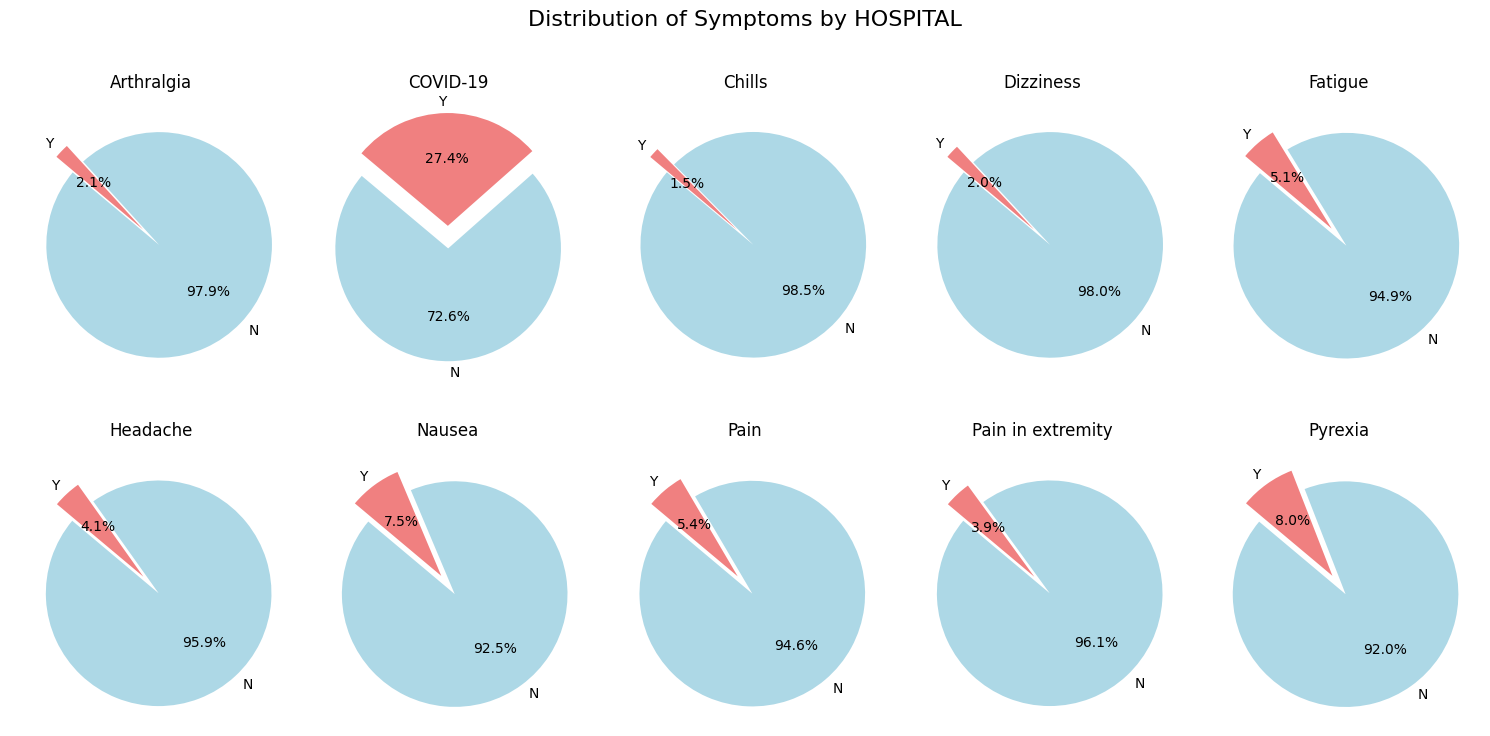

In [70]:

# Create a new DataFrame with counts for each symptom and gender
symptom_gender_counts = filtered_df.groupby(['symp', 'HOSPITAL']).size().unstack(fill_value=0)
# symptom_gender_counts["Arthralgia"]
# Set up subplots
num_symptoms = len(symptom_gender_counts)
num_cols = 5  # Adjust the number of columns based on your preference
num_rows = (num_symptoms + num_cols - 1) // num_cols

fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 8))

# Iterate over each symptom and plot a pie chart
for i, (symptom, row) in enumerate(symptom_gender_counts.iterrows()):
    row_index = i // num_cols
    col_index = i % num_cols

    colors = ['lightblue', 'lightcoral', 'lightgreen', 'lightgrey']  # Customize colors as needed
    explode = (0.1,) * len(row.index)  # Adjust the explode values to have the same length as the number of categories

    axes[row_index, col_index].pie(row, labels=row.index, colors=colors, autopct='%1.1f%%', startangle=140, explode=explode)
    axes[row_index, col_index].set_title(f'{symptom}')

# Add main title
main_title = "Distribution of Symptoms by HOSPITAL"
plt.suptitle(main_title, fontsize=16)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.show()

In [74]:
symptom_gender_counts

OFC_VISIT                                   N     Y
symp              HOSPITAL ER_ED_VISIT             
Arthralgia        N        N            12731  5580
                           Y              740   893
                  Y        N              135    36
                           Y              118   143
COVID-19          N        N             5479  6208
                           Y             1187   414
                  Y        N             3763    73
                           Y             1056   113
Chills            N        N            19087  2794
                           Y              778   329
                  Y        N              182     8
                           Y              108    51
Dizziness         N        N            12906  2324
                           Y             2667   535
                  Y        N              152    15
                           Y               83   119
Fatigue           N        N             8311  2406
                           Y              489   527
                  Y        N              270    23
                           Y              168   175
Headache          N        N             7304  2410
                           Y              675   563
                  Y        N              154    25
                           Y              151   133
Nausea            N        N             3980  1100
                           Y              594   352
                  Y        N              207    18
                           Y              158   108
Pain              N        N             4996  2027
                           Y              433   510
                  Y        N              182    12
                           Y              140   123
Pain in extremity N        N             4229  1511
                           Y              295   320
                  Y        N               66    13
                           Y               72   105
Pyrexia           N        N             6356  2115
                           Y              512   373
                  Y        N              395    16
                           Y              253   147